In [3]:
PROVIDE_OWN_INPUT = False

In [1]:
from google.colab import files
files.upload()

{}

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
data = pd.read_csv('dataset6.csv')

In [17]:
data.head()

,Company Name,Net Sales,Cons OCF,Cons PAT,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,1344,-51.32,-976.27,-0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,40.47,-0.11,-2.27,18.69,0.36
1,3M India Ltd.,1840,177.37,108.34,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,13.50,0.11,0.03,39.39,3.72
2,ABB India Ltd.,104,479.00,228.51,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.96,0.04,-0.08,53.97,2.54
3,Abbott India Ltd.,7733,214.78,228.96,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,19.38,NaN,NaN,18.28,3.07
4,Accelya Solutions India Ltd.,2289,66.28,67.40,0.98,39.81,22.26,79.73,60.01,95.47,0.98,0.00,21.90,0.13,0.21,8.30,3.82


In [18]:
test = data.iloc[:,:]

In [19]:
data = data.replace( ' -   ', np.nan)

In [20]:
data.dtypes

Company Name                     object
Net Sales                         int64
Cons OCF                        float64
Cons PAT                        float64
OCF/PAT                         float64
PBIDTM (%)                      float64
PATM (%)                        float64
FR_Dividend Pay Out Ratio(%)    float64
ROE (%)                         float64
ROCE (%)                        float64
Asset Turnover(x)               float64
Total Debt/Equity(x)            float64
Free Float                      float64
5 YR Sales CAGR                 float64
5 YR PAT CAGR                   float64
Ev/EBITDA                       float64
M/Sales                         float64
dtype: object

In [21]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [22]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [23]:
data.fillna(data.mean(), inplace=True)

In [24]:
len(data.columns)

17

# **Ev/EBITDA Prediction**

In [25]:
data1 = data.iloc[:,:-1 ]

In [26]:
data1.head()


,Company Name,Net Sales,Cons OCF,Cons PAT,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,Ev/EBITDA
0,3I Infotech Ltd.,1344.0,-51.32,-976.27,-0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,40.47,-0.110000,-2.270000,18.69
1,3M India Ltd.,1840.0,177.37,108.34,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,13.50,0.110000,0.030000,39.39
2,ABB India Ltd.,104.0,479.00,228.51,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.96,0.040000,-0.080000,53.97
3,Abbott India Ltd.,7733.0,214.78,228.96,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,19.38,0.194331,-0.171732,18.28
4,Accelya Solutions India Ltd.,2289.0,66.28,67.40,0.98,39.81,22.26,79.73,60.01,95.47,0.98,0.00,21.90,0.130000,0.210000,8.30


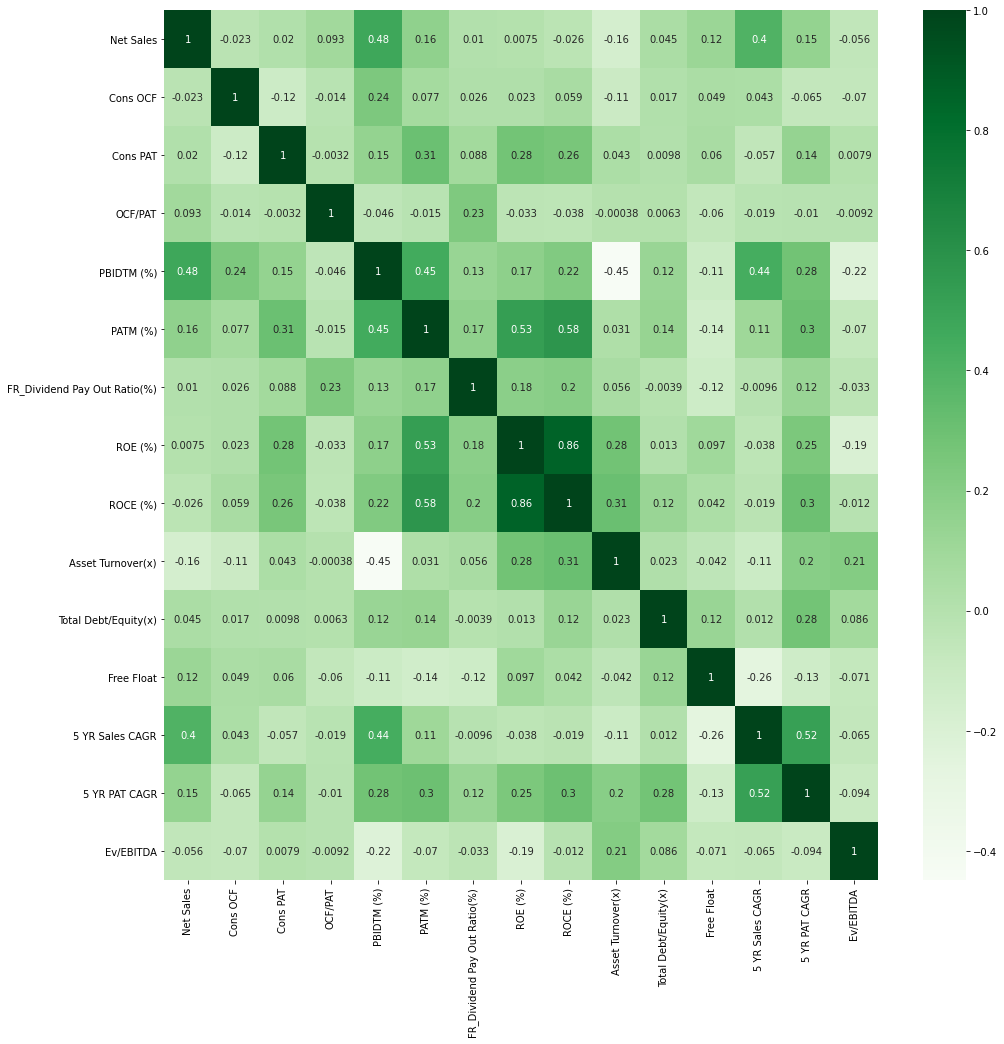

In [27]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

## Selecting most important features:

In [32]:
cor_target = abs(cor["Ev/EBITDA"])
feat = list(cor_target.sort_values(ascending=False).index[1:7])
cor_target.sort_values(ascending=False)[1:7]
#print(list(cor_target.index))

PBIDTM (%)              0.222203
Asset Turnover(x)       0.209427
ROE (%)                 0.192377
5 YR PAT CAGR           0.094222
Total Debt/Equity(x)    0.086145
Free Float              0.071204
Name: Ev/EBITDA, dtype: float64

In [33]:
X,y = data1[feat], data1['Ev/EBITDA']

In [34]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [35]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [36]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

 0 LassoCV                 879.2766576905
 1 XGBRegressor            1106.3483347283
 2 RidgeCV                 877.7569841664
 3 BayesianRidge           923.1950214608
 4 ARDRegression           908.4883095636
 5 ElasticNetCV            906.7600641817
 6 LassoLarsCV             898.6896387832
 7 SVR                     1007.2725424041


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [37]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 0.11032
 1 XGBRegressor            -0.11943
 2 RidgeCV                 0.11186
 3 BayesianRidge           0.06589
 4 ARDRegression           0.08077
 5 ElasticNetCV            0.08252
 6 LassoLarsCV             0.09068
 7 SVR                     -0.01919


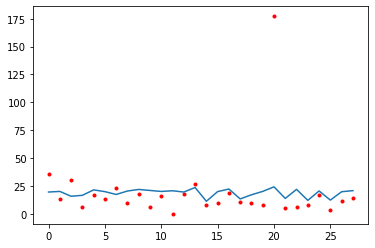

In [38]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[3])

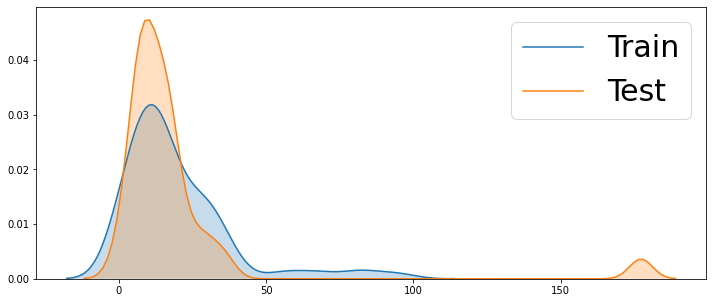

In [39]:
plt.subplots(figsize=(12,5))
sns.kdeplot(y_train, shade=True, label='Train')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

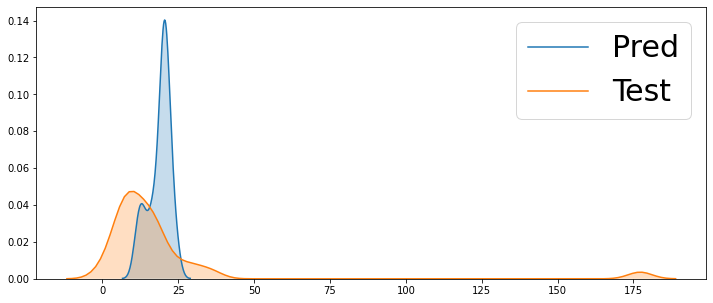

In [40]:
plt.subplots(figsize=(12,5))
sns.kdeplot(pred_list[3], shade=True, label='Pred')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

# **M/Sales Prediction**

In [41]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [42]:
data2.head()

,Company Name,Net Sales,Cons OCF,Cons PAT,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,M/Sales
0,3I Infotech Ltd.,1344.0,-51.32,-976.27,-0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,40.47,-0.110000,-2.270000,0.36
1,3M India Ltd.,1840.0,177.37,108.34,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,13.50,0.110000,0.030000,3.72
2,ABB India Ltd.,104.0,479.00,228.51,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.96,0.040000,-0.080000,2.54
3,Abbott India Ltd.,7733.0,214.78,228.96,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,19.38,0.194331,-0.171732,3.07
4,Accelya Solutions India Ltd.,2289.0,66.28,67.40,0.98,39.81,22.26,79.73,60.01,95.47,0.98,0.00,21.90,0.130000,0.210000,3.82


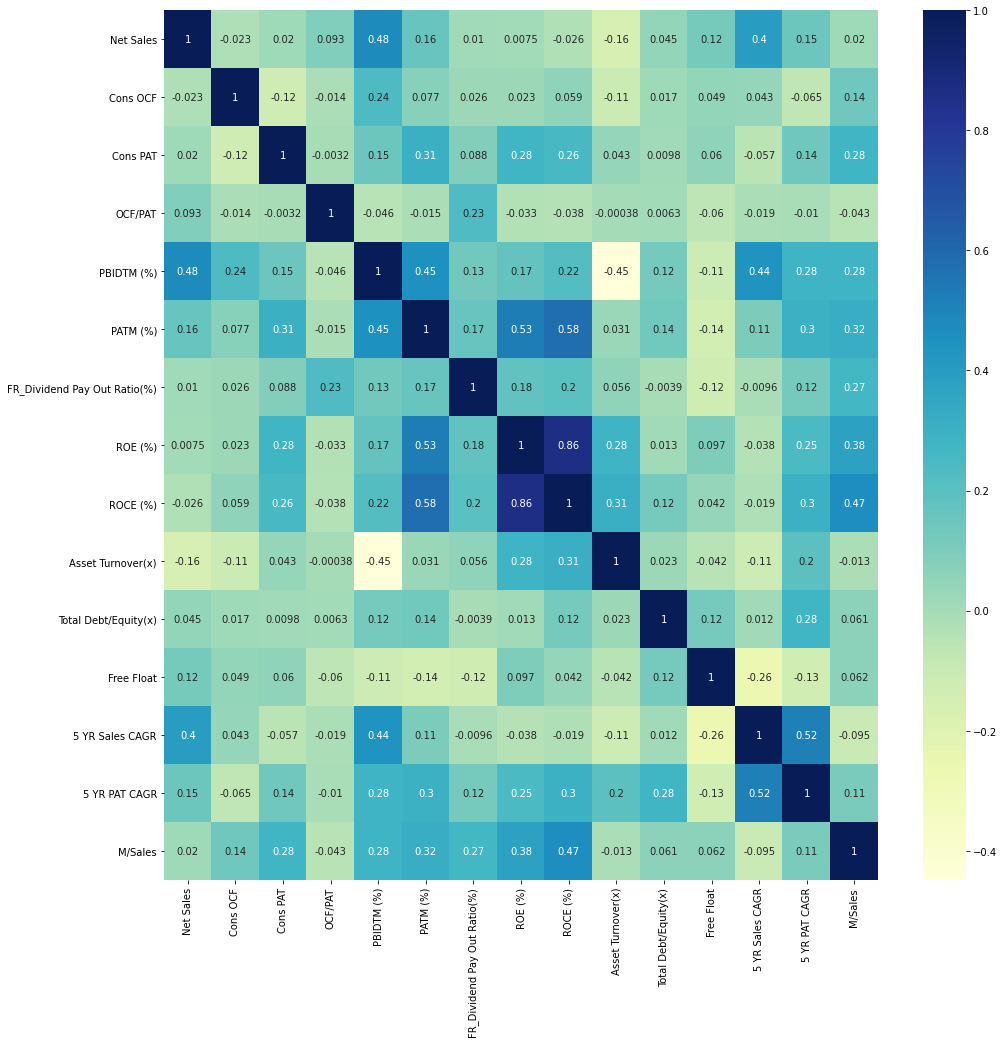

In [43]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [44]:
cor_target = abs(cor["M/Sales"])
feat = list(cor_target.sort_values(ascending=False).index[1:7])
cor_target.sort_values(ascending=False)[1:7]

ROCE (%)                        0.466173
ROE (%)                         0.382587
PATM (%)                        0.319619
PBIDTM (%)                      0.281408
Cons PAT                        0.279047
FR_Dividend Pay Out Ratio(%)    0.269078
Name: M/Sales, dtype: float64

In [45]:
X,y = data2[feat], data2['M/Sales']

In [46]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [47]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [48]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 2.05183
 1 XGBRegressor            1.93959
 2 RidgeCV                 1.98210
 3 BayesianRidge           2.01480
 4 ARDRegression           1.99209
 5 ElasticNetCV            2.05848
 6 LassoLarsCV             2.11964
 7 SVR                     2.25274


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [49]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 0.14574
 1 XGBRegressor            0.23665
 2 RidgeCV                 0.20282
 3 BayesianRidge           0.17629
 4 ARDRegression           0.19476
 5 ElasticNetCV            0.14020
 6 LassoLarsCV             0.08835
 7 SVR                     -0.02975


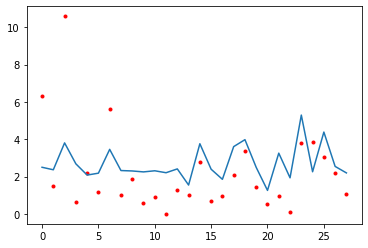

In [50]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[2])

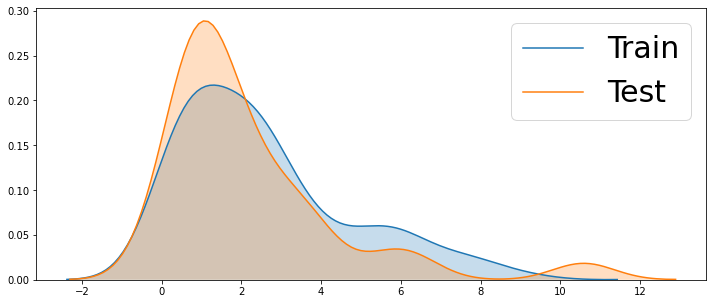

In [51]:
plt.subplots(figsize=(12,5))
sns.kdeplot(y_train, shade=True, label='Train')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

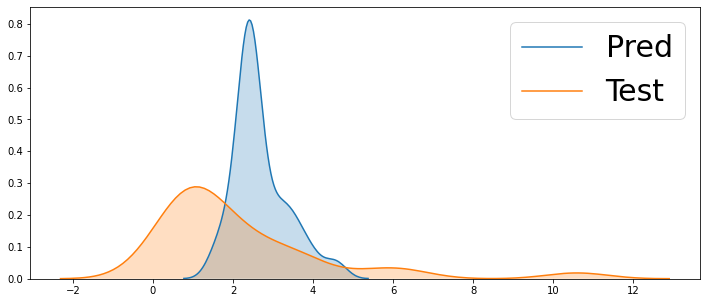

In [52]:

plt.subplots(figsize=(12,5))
sns.kdeplot(pred_list[3], shade=True, label='Pred')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})